In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('seaborn')

In [3]:
df = pd.read_csv('goodreads_.csv')

(I manually labeled gender, merged and saved as a new csv)

In [121]:
#df = df.merge(gender, on='Author')

In [4]:
df.head()

,Book Id,Title,Author,Author l-f,Additional Authors,ISBN,ISBN13,My Rating,Average Rating,Publisher,...,Original Purchase Date,Original Purchase Location,Condition,Condition Description,BCID,gender,difference,year_read,month_read,review_words
0,24836,The Floating Opera and The End of the Road,John Barth,"Barth, John",NaN,"=""0385240899""","=""9780385240895""",4,4.03,Anchor Books,...,NaN,NaN,NaN,NaN,NaN,male,0.03,2020,2,108.0
1,24836,The Floating Opera and The End of the Road,John Barth,"Barth, John",NaN,"=""0385240899""","=""9780385240895""",4,4.03,Anchor Books,...,NaN,NaN,NaN,NaN,NaN,male,0.03,2020,2,108.0
2,12885,Lost in the Funhouse,John Barth,"Barth, John",NaN,"=""0385240872""","=""9780385240871""",4,3.71,Anchor Books,...,NaN,NaN,NaN,NaN,NaN,male,0.29,2014,2,8.0
3,12885,Lost in the Funhouse,John Barth,"Barth, John",NaN,"=""0385240872""","=""9780385240871""",4,3.71,Anchor Books,...,NaN,NaN,NaN,NaN,NaN,male,0.29,2014,2,8.0
4,6238505,Cartesian Sonata and Other Novellas,William H. Gass,"Gass, William H.",NaN,"=""1564785025""","=""9781564785022""",2,3.92,Dalkey Archive Press,...,NaN,NaN,NaN,NaN,NaN,male,1.92,2020,2,140.0


In [11]:
df = df.drop_duplicates(subset='Book Id').copy()
df.head()

,Book Id,Title,Author,Author l-f,Additional Authors,ISBN,ISBN13,My Rating,Average Rating,Publisher,...,Original Purchase Date,Original Purchase Location,Condition,Condition Description,BCID,gender,difference,year_read,month_read,review_words
0,24836,The Floating Opera and The End of the Road,John Barth,"Barth, John",NaN,"=""0385240899""","=""9780385240895""",4,4.03,Anchor Books,...,NaN,NaN,NaN,NaN,NaN,male,0.03,2020,2,108.0
2,12885,Lost in the Funhouse,John Barth,"Barth, John",NaN,"=""0385240872""","=""9780385240871""",4,3.71,Anchor Books,...,NaN,NaN,NaN,NaN,NaN,male,0.29,2014,2,8.0
4,6238505,Cartesian Sonata and Other Novellas,William H. Gass,"Gass, William H.",NaN,"=""1564785025""","=""9781564785022""",2,3.92,Dalkey Archive Press,...,NaN,NaN,NaN,NaN,NaN,male,1.92,2020,2,140.0
6,156185,On Being Blue,William H. Gass,"Gass, William H.",NaN,"=""0879232374""","=""9780879232375""",3,3.93,David R. Godine Publisher,...,NaN,NaN,NaN,NaN,NaN,male,0.93,2014,8,31.0
8,1071726,The Peregrine,J.A. Baker,"Baker, J.A.",NaN,"=""1590171330""","=""9781590171332""",1,4.18,NYRB Classics,...,NaN,NaN,NaN,NaN,NaN,male,3.18,2020,1,162.0


In [12]:
df.gender.value_counts(normalize=True)

male      0.832911
female    0.167089
Name: gender, dtype: float64

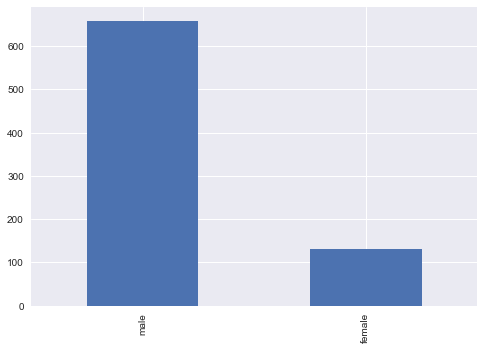

In [13]:
df.gender.value_counts().plot(kind='bar');

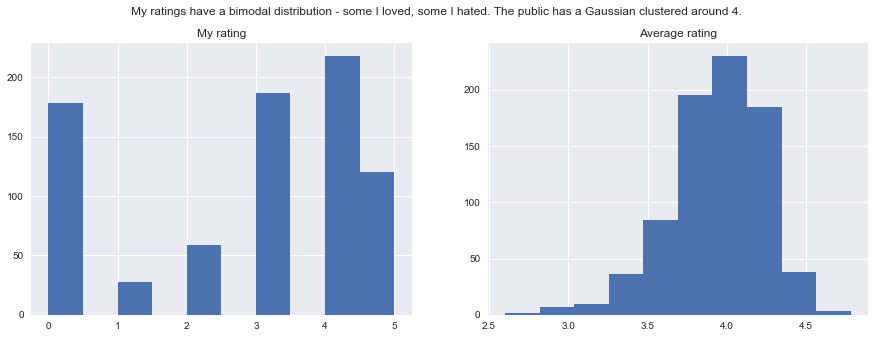

In [14]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
plt.suptitle('My ratings have a bimodal distribution - some I loved, some I hated. The public has a Gaussian clustered around 4.')
df['My Rating'].hist(ax=ax1)
ax1.set_title('My rating')
df['Average Rating'].hist(ax=ax2)
ax2.set_title('Average rating');

In [15]:
df['difference'] = np.abs(df['My Rating'] - df['Average Rating'])
df.sort_values(by='difference', ascending=False)[['Title', 'Author', 'My Rating', 'Average Rating']].head()

,Title,Author,My Rating,Average Rating
552,Bottom: On Shakespeare,Louis Zukofsky,0,4.55
254,The Iranian Talmud: Reading the Bavli in Its S...,Shai Secunda,0,4.50
1139,The Geography of the Imagination: Forty Essays,Guy Davenport,0,4.43
1203,Irritant,Darby Larson,0,4.42
504,Enthusiasm: A Chapter in the History of Religi...,Ronald Knox,0,4.42


All books I have't rated 🤦‍. Let's filter them out:

In [16]:
df[df['My Rating'] > 0].sort_values(by='difference', ascending=False)[['Title', 'Author', 'My Rating', 'Average Rating']].head()

,Title,Author,My Rating,Average Rating
186,Deep Work: Rules for Focused Success in a Dist...,Cal Newport,1,4.20
543,How to Win Friends and Influence People,Dale Carnegie,1,4.19
8,The Peregrine,J.A. Baker,1,4.18
139,Hinges: Meditations on the Portals of the Imag...,Grace Dane Mazur,1,4.17
67,"Grammars of Creation (Gifford Lectures, 1990.)",George Steiner,1,4.07


Yes...makes sense. Except for _The Peregrine_ which is a fine book, just not what I was expecting.

In [19]:
df.loc[df['My Rating'] > 0, 'My Rating'].mean(), df.loc[df['My Rating'] > 0, 'My Rating'].median()

(3.560457516339869, 4.0)

In [20]:
df['Average Rating'].mean(), df['Average Rating'].median()

(3.9395949367088603, 3.97)

I'm not much harsher than average, good to know.

#### Page counts

In [21]:
df['Number of Pages'].mean(), df['Number of Pages'].median()

(363.3470967741936, 304.0)

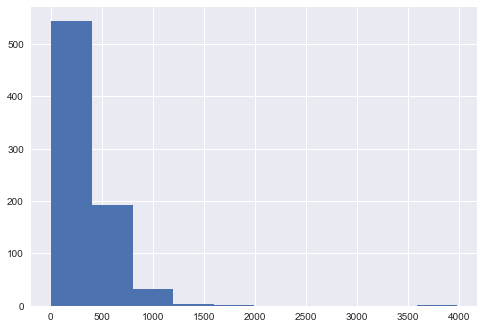

In [22]:
df['Number of Pages'].hist();

Wow! What is that beast outlier?

In [23]:
df.sort_values(by='Number of Pages', ascending=False)[['Title', 'Author', 'Number of Pages']].head()

,Title,Author,Number of Pages
514,The History of the Decline and Fall of the Rom...,Edward Gibbon,3980.0
255,The Rise and Fall of the Third Reich: A Histor...,William L. Shirer,1614.0
24,War and Peace,Leo Tolstoy,1392.0
306,The Power Broker: Robert Moses and the Fall of...,Robert A. Caro,1344.0
1075,U.S.A.: The 42nd Parallel / 1919 / The Big Money,John Dos Passos,1288.0


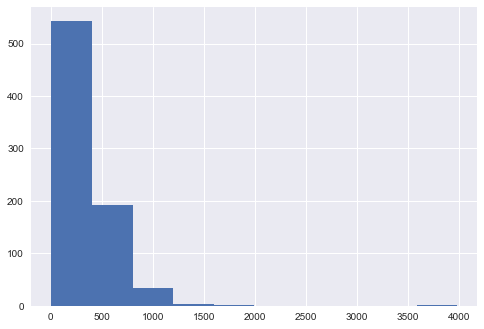

In [24]:
df.drop(236)['Number of Pages'].hist();

Mostly in that <500 pp. range. Makes sense.

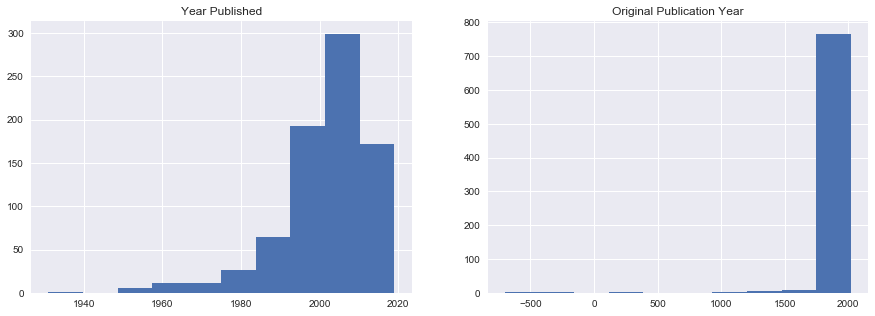

In [25]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
df['Year Published'].hist(ax=ax1)
ax1.set_title('Year Published')
df['Original Publication Year'].hist(ax=ax2)
ax2.set_title('Original Publication Year');

Yikes. Some outliers on that plot on the right...

In [26]:
df.sort_values(by='Original Publication Year')[['Title', 'Author', 'Original Publication Year']].head(50)

,Title,Author,Original Publication Year
1170,The Odyssey,Homer,-700.0
1190,Tao Te Ching,Lao Tzu,-600.0
624,Euthyphro,Plato,-399.0
620,Poetics,Aristotle,-335.0
1082,Meditations,Marcus Aurelius,180.0
1113,Beowulf,Unknown,975.0
1094,Purgatorio (La Divina Commedia #2),Dante Alighieri,1316.0
1097,"Paradiso (The Divine Comedy, #3)",Dante Alighieri,1320.0
1091,Inferno,Dante Alighieri,1320.0
1116,The Canterbury Tales,Geoffrey Chaucer,1390.0


Makes sense. Let's try cutoffs at 1000 and 1900 AD.

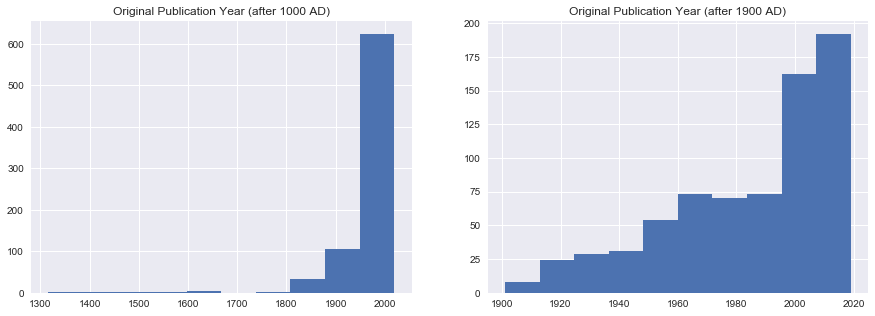

In [27]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
df.loc[df['Original Publication Year'] > 1000, 'Original Publication Year'].hist(ax=ax1)
ax1.set_title('Original Publication Year (after 1000 AD)')
df.loc[df['Original Publication Year'] > 1900, 'Original Publication Year'].hist(ax=ax2)
ax2.set_title('Original Publication Year (after 1900 AD)');

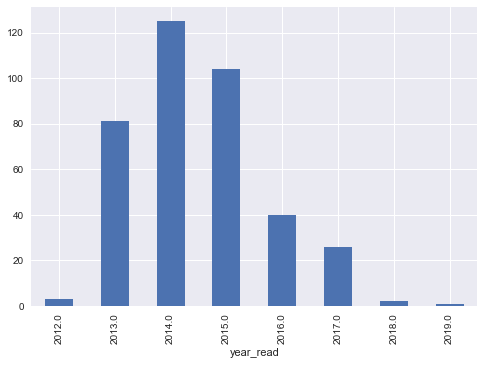

In [28]:
df['year_read'] = pd.to_datetime(df['Date Read']).dt.year
df['month_read'] = pd.to_datetime(df['Date Read']).dt.month
df.groupby('year_read')['Title'].count().plot(kind='bar');

Pretty sure I read more than 20 books last year, so something's wrong there.

![title](books.png)

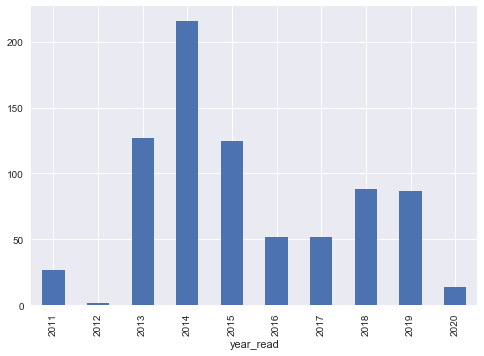

In [29]:
df['year_read'] = pd.to_datetime(df['Date Added']).dt.year
df['month_read'] = pd.to_datetime(df['Date Added']).dt.month
df.groupby('year_read')['Title'].count().plot(kind='bar');

This inflates 2014 since that year I catalogued a lot of books that I'd read in past years, but otherwise better. 

In [30]:
df['review_words'] = df['My Review'].str.split().str.len()

In [31]:
df.sort_values(by='review_words', ascending=False)[['Title', 'Author', 'review_words']].head(20)

,Title,Author,review_words
811,The Rebirth of Classical Political Rationalism...,Leo Strauss,3136.0
167,"The Fabric of the Cosmos: Space, Time, and the...",Brian Greene,1607.0
38,The House of Morgan: An American Banking Dynas...,Ron Chernow,1287.0
45,"Judaism, Human Values, and the Jewish State",Yeshayahu Leibowitz,983.0
1047,My Traitor's Heart: A South African Exile Retu...,Rian Malan,871.0
475,The Worldly Philosophers,Robert L. Heilbroner,856.0
56,"Days of Rage: America's Radical Underground, t...",Bryan Burrough,783.0
160,The Death and Life of Great American Cities,Jane Jacobs,778.0
50,The Man Without Qualities: Vol. 2,Robert Musil,738.0
223,Louis D. Brandeis: American Prophet,Jeffrey Rosen,723.0


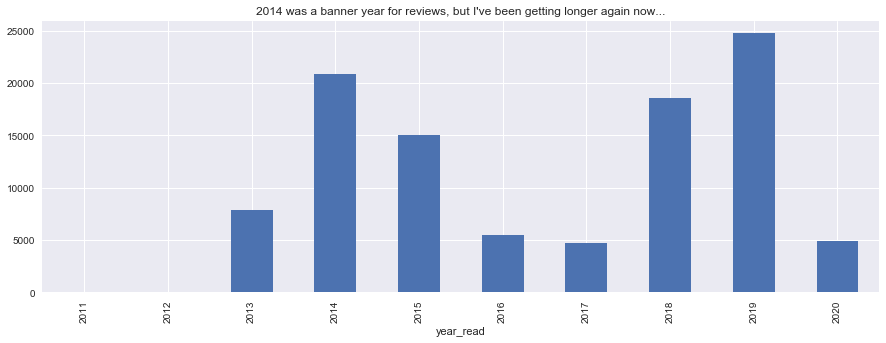

In [32]:
df.groupby('year_read')['review_words'].sum().plot(figsize=(15,5), kind='bar', 
    title="2014 was a banner year for reviews, but I've been getting longer again now...");